<div style="background-color:lightblue">
<h1><center>
    The Data Science Labs on <br/>
     Multivariable Calculus  <br/>
   <small>by Kindyl King and Mireille Boutin</small>
</center></h1>
    </div>

<h1><center>
    Laboratory 2:<br/>
    Human Perception of Color <br/>
    <p style="font-size: 16px"> Last Updated on April 27, 2022</p>
</center></h1>

<h2 style="color:orange;"><left> Content </left></h2>

#### Mathematics ###
- 3 dimensional vectors
- numerical and symbolic integration
- integral properties
- Dirac delta function
- gradient descent optimization
- matrix operations
- injectivity and surjectivity of maps
### Programming Skills ###
- multi-dimensional array manipulation
- functions
### Embedded Systems ###
- N/A

<h2 style="color:orange;"><left> Required Hardware </left></h2> 

- N/A

### <span style="background-color:lightblue"> Fill in information below: </span>
__Name:__ me

__Email:__ me @ purdue.edu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## What is Color?

You may be wondering why we have been describing color will only 3 values. Why not 2 or 4?
The reason is rooted in the anatomy of our eyes.
There are three different types of receptors in the human eye called cones or cone cells. One cone type is more sensitive to longer wavelengths (560 nm), another to medium wavelengths (530 nm), and the other to short wavelengths (420 nm).
This biological stucture of the eye is the basis of the trichromatic theory of color and allows us to describe color in terms of vector spaces. 

In a trichromatic model, the sensor, such as your eye or a camera, is charactrized by three spectral response functions.
The experiments by Wright and Guild indirectly measured these response functions for the human visual system.
Eventually, in the 2000's, Stockman, Sharpe and Fach 
[[ref1]](https://www.sciencedirect.com/science/article/pii/S0042698900000213)
[[ref2]](https://www.sciencedirect.com/science/article/pii/S0042698998002259)
measured the actual cone spectral sensitivity. Their experiemental values are in the file *cone_responses.csv*. The file extension csv stands for comma-separated values. If you open the csv file, you will see commas separating 4 values in each row. 
The first column is wavelength $\lambda$ in nanometers. The second column is the spectral sensitivity $Q_L(\lambda)$ of the L-cones. The third column is the spectral sensitivity $Q_M(\lambda)$ of M-cones. The second column is the spectral sensitivity $Q_S(\lambda)$ of S-cones.

In the following exercise you will fill in code to plot the three functions. Note that there are no values of $Q_S(\lambda)$ available after $\lambda=$ 615 nm from the experimental data, but we can effectively set those missing values to zero.  

### <span style="color:red">Exercise</span>

Plot $Q_L(\lambda),Q_M(\lambda)$, and $Q_S(\lambda)$ all on one graph. See [matplotlib's documentation](https://matplotlib.org/3.5.0/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) on how to add a legend to your plot. The $x$-axis label should be wavelength in nanometers. The $y$-axis label should be spectral sensitivity.

### <span style="background-color:lightblue">Answer</span>

In [ ]:
data = np.genfromtxt('cone_responses.csv',        # name of the file
                      delimiter=',',              # numbers in the file are separated by commas
                      filling_values=0)           # set missing values to zero

In [ ]:
# solution
lambdas, L, M, S = np.genfromtxt('cone_responses.csv', delimiter=',', unpack=True, filling_values=0)
plt.plot(lambdas, L, 'r', label='L-cone')
plt.plot(lambdas, M, 'g', label='M-cone')
plt.plot(lambdas, S, 'b', label='S-cone')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Sensitivity')
plt.legend()
plt.show()

### <span style="color:red">Exercise</span>

For each of the three curves $Q_L(\lambda),Q_M(\lambda)$, and $Q_S(\lambda)$, fit the points of the graph with a polynomial so that the mean squared error is less than $0.002$. Plot the original data as a scatter plot and the interpolant as a line on the same graph.

*Hint: Define a function that calculates the mean squared error for an interpolant and use a loop to find the degree of interpolant with low enough error.*

### <span style="background-color:lightblue">Answer</span>

In [ ]:
# student answer here
from numpy.polynomial import Polynomial

# example on how to fit a quadratic polynomial to the test data x and y
x = np.array([1.0,2.0,3.0])
y = np.array([-1.3,3.2,11.0])
example_interpolant = Polynomial.fit(x,y, deg=2)
plt.plot(x,example_interpolant(x))
plt.show()

In [ ]:
# partial solution
from numpy.polynomial import Polynomial

def mean_square_error(x, y, interpolant):
    mse = np.average((interpolant(x)-y)**2)
    return mse

L_interpolant = Polynomial.fit(lambdas, L, deg=11)
M_interpolant = Polynomial.fit(lambdas, M, deg=10)
S_interpolant = Polynomial.fit(lambdas, S, deg=11)

plt.scatter(lambdas, L, c='r', label='L-cone')
plt.scatter(lambdas, M, c='g', label='M-cone')
plt.scatter(lambdas, S, c='b', label='S-cone')
plt.plot(lambdas, L_interpolant(lambdas), 'r')
plt.plot(lambdas, M_interpolant(lambdas), 'g')
plt.plot(lambdas, S_interpolant(lambdas), 'b')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Sensitivity')
plt.legend()
plt.show()


## Trichromatic Sensor Model

The polynomials you obtained approximate the sensitivity of each type of cone to a different wavelength. A given type of cone cell reacts to a large spectrum of wavelengths, but in different amounts for different frequencies. For example, the L-cones react a lot more at 430 nm (the peak of their corresponding curve on the graph) than to 400 nm. So if the human eye is seeing the color blue at a wavelength of, say, 453 nm, then the L-cones have a high response, while the M and S cells have a small response.
This specific shade of blue, or more precisely, the way we perceive this shade of blue, can thus be recorded using three numbers, namely the responses of the three types of cells. 

When referring to the human visual system, the standard terminology is Red (R) for Long (L), Green (G) for Medium (M) and Blue (B) for Short (S).
Hence, we write the sensor responses as a vector $(R_S,G_S,B_S)$ in $\mathbb{R}^3$, where R,G, and B stand for the three cone types and the subscript S is for stimulus.
We call $(R_S,G_S,B_S)$ the *tristimulus vector* with respect to stimulus S.


For a stimulus $S(\lambda)$, the tristimulus vector values are given by $
    \begin{align*}
        R_S &= \int_{390}^{700} S(\lambda)Q_R(\lambda)d\lambda \\
        G_S &= \int_{390}^{700} S(\lambda)Q_G(\lambda)d\lambda \\
        B_S &= \int_{390}^{700} S(\lambda)Q_B(\lambda)d\lambda \\
    \end{align*}$

### <span style="color:red">Exercise</span>

Not all values of $(R_S,G_S,B_S)$ are possible. Give two such examples and explain your choices. 

### <span style="background-color:lightblue">Answer</span>

*student answer here*

## Linearity of Sensor Responses

Suppose two stimuli $S_1(\lambda)$ and $S_2(\lambda)$ yield sensor responses $(R_1,G_1,B_1)$ and $(R_2,G_2,B_2)$, respectively. Then R sensor response to the stimulus $a S_1(\lambda) + b S_2(\lambda)$ is $
    \begin{align*}
        R_S &= \int_{390}^{700} [a S_1(\lambda) + b S_2(\lambda)] Q_R(\lambda)d\lambda \\
        &= \int_{390}^{700} [a S_1(\lambda)Q_R(\lambda) + b S_2(\lambda)Q_R(\lambda)] d\lambda \\
        &= \int_{390}^{700} a S_1(\lambda)d\lambda  + \int_{390}^{700} b S_2(\lambda) Q_R(\lambda)d\lambda \\
        &= a \int_{390}^{700} S_1(\lambda)d\lambda  + b \int_{390}^{700} S_2(\lambda) Q_R(\lambda)d\lambda \\
        &= a R_1 + b R_2.
    \end{align*}$

### <span style="color:red">Exercise</span>

Calculate the tristimulus vector with respect to the stimulus $
    S(\lambda) = \begin{cases}
        1, 450 \leq \lambda \leq 650 \\
        0, \text{ otherwise}
    \end{cases}$
in two ways:
1. using the trapezoidal rule to estimate $R_S,G_S,B_S$
1. using your polynomial interpolants of $Q_R,Q_G,$ and $Q_B$ to integrate symbolically

For the symbolic integration, see NumPy's `polyint` function [here](https://numpy.org/doc/stable/reference/generated/numpy.polyint.html)

### <span style="background-color:lightblue">Answer</span>

In [ ]:
# student answer here


### <span style="color:red">Exercise</span>

In real life, many types of light contain a continuous range of frequencies in different amounts. For example, a red light will emit a range of frequencies in the red area of the frequency spectrum, as well as potentially small amounts of other frequencies as well. The International Commission on Illumination (CIE) provides standardization of light, illuminants, and color. 
The [CIE D65 illuminant](https://haralick.org/DV/cie_2004_colorimetry.pdf) describes average midday light. 

Calculate the tristimulus vector of the D65 illuminant in two ways
1. using the trapezoidal rule to estimate the three integrals
1. approximating the spectral power distribution of the illuminant with a high enough degree polynomial and using your polynomial interpolants of $Q_R,Q_G,$ and $Q_B$ to integrate symbolically. Justify your choice a "high enough degree polynomial" for the D65 illuminant.

### <span style="background-color:lightblue">Answer</span>


In [ ]:
# student answer here

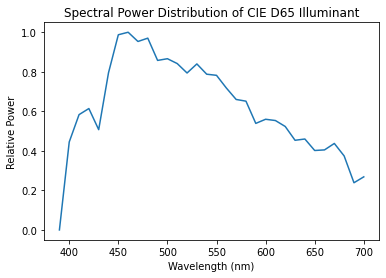

In [14]:
d65 = np.genfromtxt('d65_spectrum.txt', usecols=(1))

plt.plot(lambdas, d65)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Power')
plt.title('Spectral Power Distribution of CIE D65 Illuminant')
plt.show() 

### <span style="color:red">Exercise</span>

Write a function depending on $n$ that calculates the tristimulus vector with respect to the stimulus $
    S(\lambda) = \begin{cases}
        1, \quad 500-n \leq \lambda \leq 500+n \\
        0, \quad \text{ otherwise}
    \end{cases}$
What is the result when $n=20$? $n=2$? $n=0.2$? Does is look like the resulting vector is approaching any specific values?

### <span style="background-color:lightblue">Answer</span>

In [ ]:
# student answer here

## The Dirac Delta Function

### <span style="color:red">Exercise</span>

On a single graph, plot the function
$f(x) = \begin{cases}
    \frac{1}{\Delta}, \quad -\Delta \leq x \leq \Delta \\
    0, \quad \text{ otherwise}
\end{cases}$
for different values of $\Delta$. What happens when $\Delta$ is very small?

### <span style="background-color:lightblue">Answer</span>

In [ ]:
# student answer here

The Dirac delta function is $
    \delta(x) = \lim_{\Delta \to 0} f(x)$
and has the property $
    \int_{-\infty}^\infty \delta(x)dx = 1.$




Why is the delta function useful? Consider again the example of observing a pure blue wavelength of 453 nm. 
We can write the monochromatic stimulus as $S(\lambda)=\delta(\lambda - 453)$, 
so the tristimus vector is simply $(Q_R(453), Q_G(453), Q_B(453))$.

## Metamerism

Two stimuli $S_1(\lambda)$ and $S_2(\lambda)$ are said to be *metameric* if $(R_1,G_1,B_1) = (R_2,G_2,B_2)$, i.e., the responses of two different stimuli are identical.

Let's simplify our model by approximating the integral values $R_S,G_S,B_S$ by their left Riemann sums on the domain $390 \leq \lambda \leq 700$ using a step length of $5$, so
$\begin{align*}
    R_S = \int_{390}^{700} S(\lambda)Q_R(\lambda)d\lambda & \approx 5[S(390)Q_R(390) + S(395)Q_R(395) + \cdots + S(695)Q_R(695) ] \\
    G_S = \int_{390}^{700} S(\lambda)Q_G(\lambda)d\lambda & \approx 5[S(390)Q_G(390) + S(395)Q_G(395) + \cdots + S(695)Q_G(695) ] \\
    B_S = \int_{390}^{700} S(\lambda)Q_B(\lambda)d\lambda & \approx 5[S(390)Q_B(390) + S(395)Q_B(395) + \cdots + S(695)Q_B(695) ] \\
\end{align*}.$

We can rewrite these equations using matrix notation.
$ \begin{bmatrix}
        R_S \\ G_S \\ B_S
    \end{bmatrix} \approx 5\begin{bmatrix}
        Q_R(390) & Q_R(395) & \cdots & Q_R(695) \\
        Q_G(390) & Q_G(395) & \cdots & Q_G(695) \\
        Q_B(390) & Q_B(395) & \cdots & Q_B(695) \\
    \end{bmatrix}
    \begin{bmatrix}
        S(390) \\ S(395) \\ \vdots \\ S(695)
    \end{bmatrix}.$
    
Define the matrix $A := 5\begin{bmatrix}
        Q_R(390) & Q_R(395) & \cdots & Q_R(695) \\
        Q_G(390) & Q_G(395) & \cdots & Q_G(695) \\
        Q_B(390) & Q_B(395) & \cdots & Q_B(695) \\
    \end{bmatrix}$
and call the vector of stimulus spectrum values
$\vec{s} = \begin{bmatrix}
        S(390) \\ S(395) \\ \vdots \\ S(695)
    \end{bmatrix}.$
Then, 
 $ \begin{bmatrix}
        R_S \\ G_S \\ B_S
    \end{bmatrix} = A\vec{s}.$


To find a metamer for stimulus $S_1(\lambda)$, we want to find a vector $\vec{x}$ that minimizes the function 
$
f(\vec{x}) = || A\vec{x}-\vec{b} ||^2,
$
where $\vec{b}$ is the tristimulus vector with respect to $S_1(\lambda)$. 
The function $||\cdot||^2 $ is the distance squared between the two vectors $A\vec{x}$ and $\vec{b}$.
If $f(\vec{x})=0$, then that means the stimulus described by $\vec{x}$ has the same tristimulus vector as $S_1(\lambda)$.
Since $f(\vec{x})$ is never negative, we will find a way the minimize $f(\vec{x})$.
The algorithm we will use to minimize $f(\vec{x})$ is called gradient descent. The gradient of $f(\vec{x})$ is 
$
\nabla f(\vec{x}) = 2 A^T (A\vec{x}-\vec{b}).
$
The gradient tells us the direction of steepest descent of the function when we are at $\vec{x}$.
The idea is 
- pick a starting vector $\vec{x}_0$
- calculate the gradient at $\nabla f(\vec{x}_0)$ 
- move $\vec{x}_0$ in the negative direction of the gradient
- repeat with the updated vector until $|| \nabla f(\vec{x}_0)||^2$ is small 

At each iteration of the algorithm, we will calculate the gradient at the current point and then take a small step in the negative direction of the gradient and continue until the norm of the gradient is very small. 

There are a few parameters we need to choose beforehand like how much to move in the direction of the negative gradient and how small the norm of the gradient needs to be in order for the algorithm to stop. These are already included in the pseudocode.


### <span style="color:red">Exercise</span>

Fill in the code below to implement gradient descent for $f(\vec{x})$ to find a metamer for the D65 illuminant. Plot the spectrum of the D65 illuminant and the metamer you've found. What is the value of $f(\vec{x})$ when the gradient descent algorithm terminates?

In [ ]:
def gradient(x):
    # fill in

def gradient_descent(eta=.001):
    x = np.zeros((len(d65)-1)) # our starting place is a vector of all zeros
    while np.linalg.norm(gradient(x)) > 1e-8:
        x -= eta*gradient(x)
    return x

metamer = gradient_descent()

In [ ]:
# solution
def tristimulus(stimulus): # left riemann sum on domain 390 <= lambda <= 700
    R = 5*np.dot(stimulus, L[:-1])
    G = 5*np.dot(stimulus, M[:-1])
    B = 5*np.dot(stimulus, S[:-1])
    return np.array([R,G,B])

A = 5*np.vstack((L[:-1],M[:-1],S[:-1]))
b = tristimulus(d65[:-1])

def gradient(x):
    # students will fill this in
    r = np.matmul(A,x) - b
    return 2*np.matmul(A.T, r)

def gradient_descent(eta):
    x = np.zeros((len(d65)-1))
    while np.linalg.norm(gradient(x)) > 1e-8:
        x -= eta*gradient(x)
    return x

t = gradient_descent(eta=.001)

print('The tristimulus vectors are')
print(tristimulus(d65[:-1]))
print(tristimulus(t))

plt.plot(lambdas, d65, label='D65')
plt.plot(lambdas[:-1], t, label='Metamer')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Power')
plt.title('Spectral Distribution of Illuminant')
plt.legend()
plt.show()

### <span style="color:red">Exercise</span>

Let $f$ be the function that takes as input a visual stimulus $S(\lambda)$ and returns the tristimulus vector of $S(\lambda)$ in $\mathbb{R}^3$.

Determine if the follow statements are true or false and justify your answer.
1. $f$ is injective.
1. $f$ is surjective.

*student answer here*

## <span style="color:green">Reflection</span>

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

### <span style="background-color:lightblue">Answer</span>

*student answer here*